# Assignment 8

Bill Henderson

CSCI-E-116

Spring 2025

## Setup
### Imports

In [4]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.structural import UnobservedComponents
from sklearn.metrics import root_mean_squared_error
from fredapi import Fred
import seaborn as sns
import yaml
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
from statsmodels.tsa.vector_ar.var_model import VAR
import matplotlib.pyplot as plt
import warnings
    
warnings.simplefilter("ignore", category=UserWarning)
np.random.seed(42)

### Data Ingress

In [5]:
df = pd.read_excel('W09c_macro.xlsx', sheet_name=0)
df.columns = [x.lower() for x in df.columns]
df = df.set_index(pd.to_datetime(df.time)).drop('time',axis=1)

df

,ipmfg_ip,ip_ip,cumfg_ip,iptp_ip,ip54_ip,ip53_ip,ipfp_ip,ip521_ip,ip51_ip,ip511_ip,...,ypwgm_usna,saftod_usecon,safto_usecon,defenseshipments,cpg_usecon,statelocalemp,lafgda_labor,cpgf_usecon,cpgs_usecon,laptsva_usecon
time,,,,,,,,,,,,,,,,,,,,,
1990-01-31,61.3727,61.6352,81.4034,70.3538,76.3650,52.6478,68.1418,40.8392,78.9231,56.6829,...,3.919216,202.401700,763.460483,64.815709,830.352941,15048,742.1,2870.946342,21246.096366,4513.8
1990-02-28,62.2025,62.1951,82.2789,70.9906,76.3269,53.1280,68.9914,41.5484,79.8970,60.1486,...,3.926563,196.909886,826.381556,62.093341,852.343750,15068,739.6,2854.965818,21924.411327,4542.6
1990-03-31,62.5072,62.4916,82.4610,71.5156,76.6285,53.2146,69.5854,42.2517,80.4007,61.2557,...,3.951788,210.559390,861.155168,68.275221,819.930016,15100,733.0,2735.140995,21149.038873,4558.5
1990-04-30,62.2586,62.3511,81.9214,71.1807,76.3714,53.2505,69.2272,42.0032,80.0675,59.8669,...,3.978278,186.233663,772.514435,64.480681,820.837859,15118,727.6,2998.485862,20922.029487,4565.5
1990-05-31,62.4485,62.5353,81.9677,71.4049,76.5849,53.3954,69.4540,42.6040,80.0021,60.3753,...,4.039504,204.770546,864.540474,68.778237,824.175058,15164,725.5,2655.899071,21343.278594,4568.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-30,99.8849,103.2241,78.7116,101.5265,100.9500,105.2157,101.7750,95.7177,102.9887,107.2646,...,5.616569,209.313858,1469.121859,44.289052,1444.652710,19745,548.2,2344.443271,27666.404923,10767.1
2023-05-31,99.7784,102.9809,78.5451,101.1843,100.7935,105.0954,101.3571,95.6734,102.3006,108.2442,...,5.639082,225.339185,1733.204847,43.663574,1465.584362,19788,549.6,2287.612643,28082.306564,10810.4
2023-06-30,99.1514,102.3809,77.9690,100.3250,100.6211,104.8219,100.2180,95.5606,100.7068,104.9185,...,5.665405,260.849199,1952.982693,44.575218,1483.436019,19837,550.1,2199.975885,28513.940426,10831.7


In [6]:
quarterly = df.to_period('Q')
quarterly

,ipmfg_ip,ip_ip,cumfg_ip,iptp_ip,ip54_ip,ip53_ip,ipfp_ip,ip521_ip,ip51_ip,ip511_ip,...,ypwgm_usna,saftod_usecon,safto_usecon,defenseshipments,cpg_usecon,statelocalemp,lafgda_labor,cpgf_usecon,cpgs_usecon,laptsva_usecon
time,,,,,,,,,,,,,,,,,,,,,
1990Q1,61.3727,61.6352,81.4034,70.3538,76.3650,52.6478,68.1418,40.8392,78.9231,56.6829,...,3.919216,202.401700,763.460483,64.815709,830.352941,15048,742.1,2870.946342,21246.096366,4513.8
1990Q1,62.2025,62.1951,82.2789,70.9906,76.3269,53.1280,68.9914,41.5484,79.8970,60.1486,...,3.926563,196.909886,826.381556,62.093341,852.343750,15068,739.6,2854.965818,21924.411327,4542.6
1990Q1,62.5072,62.4916,82.4610,71.5156,76.6285,53.2146,69.5854,42.2517,80.4007,61.2557,...,3.951788,210.559390,861.155168,68.275221,819.930016,15100,733.0,2735.140995,21149.038873,4558.5
1990Q2,62.2586,62.3511,81.9214,71.1807,76.3714,53.2505,69.2272,42.0032,80.0675,59.8669,...,3.978278,186.233663,772.514435,64.480681,820.837859,15118,727.6,2998.485862,20922.029487,4565.5
1990Q2,62.4485,62.5353,81.9677,71.4049,76.5849,53.3954,69.4540,42.6040,80.0021,60.3753,...,4.039504,204.770546,864.540474,68.778237,824.175058,15164,725.5,2655.899071,21343.278594,4568.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023Q2,99.8849,103.2241,78.7116,101.5265,100.9500,105.2157,101.7750,95.7177,102.9887,107.2646,...,5.616569,209.313858,1469.121859,44.289052,1444.652710,19745,548.2,2344.443271,27666.404923,10767.1
2023Q2,99.7784,102.9809,78.5451,101.1843,100.7935,105.0954,101.3571,95.6734,102.3006,108.2442,...,5.639082,225.339185,1733.204847,43.663574,1465.584362,19788,549.6,2287.612643,28082.306564,10810.4
2023Q2,99.1514,102.3809,77.9690,100.3250,100.6211,104.8219,100.2180,95.5606,100.7068,104.9185,...,5.665405,260.849199,1952.982693,44.575218,1483.436019,19837,550.1,2199.975885,28513.940426,10831.7


In [7]:
fred_key = yaml.safe_load(open('/Users/hendwi1/.env'))['fred_key']

f_inf = Fred(api_key=fred_key)
gdpc = f_inf.get_series("GDPC1")

train_set = quarterly[quarterly.index <= "2023Q2"].copy()

test_set = gdpc.to_period('Q').loc["2023Q3":"2024Q2"]
train_set['gdpc1'] = gdpc.to_period('Q').loc[:"2023Q3"]

print("train_set",train_set.index.min(), train_set.index.max())
print("test_set",test_set.index.min(), test_set.index.max())

train_set 1990Q1 2023Q2
test_set 2023Q3 2024Q2


## Part A
### Dynamic Factor Model
#### VAR
3 PC's and 6 Lags

In [8]:
# setting up and scaling data
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_set)
pca = PCA(n_components=3)

pca.fit(train_scaled)

PCA(n_components=3)

In [9]:
transformed_data = pca.transform(train_scaled)

explained_variance = pca.explained_variance_ratio_
# Print the results
print("Original data:\n", train_set.head())
print("Scaled data:\n", train_scaled)
print("Transformed data:\n", transformed_data)
print("Explained variance ratio:", explained_variance)

Original data:
         ipmfg_ip    ip_ip  cumfg_ip  iptp_ip  ip54_ip  ip53_ip  ipfp_ip  \
time                                                                      
1990Q1   61.3727  61.6352   81.4034  70.3538  76.3650  52.6478  68.1418   
1990Q1   62.2025  62.1951   82.2789  70.9906  76.3269  53.1280  68.9914   
1990Q1   62.5072  62.4916   82.4610  71.5156  76.6285  53.2146  69.5854   
1990Q2   62.2586  62.3511   81.9214  71.1807  76.3714  53.2505  69.2272   
1990Q2   62.4485  62.5353   81.9677  71.4049  76.5849  53.3954  69.4540   

        ip521_ip  ip51_ip  ip511_ip  ...  saftod_usecon  safto_usecon  \
time                                 ...                                
1990Q1   40.8392  78.9231   56.6829  ...     202.401700    763.460483   
1990Q1   41.5484  79.8970   60.1486  ...     196.909886    826.381556   
1990Q1   42.2517  80.4007   61.2557  ...     210.559390    861.155168   
1990Q2   42.0032  80.0675   59.8669  ...     186.233663    772.514435   
1990Q2   42.6040  80

In [10]:
gdp = train_set.gdpc1
pca_df = pd.DataFrame(transformed_data, index = gdp.index)
pca_df.columns = [f"pca{i}" for i in pca_df.columns]
pca_df['gdp'] = gdp


mod_pca = ols("gdp ~ pca0 + pca1 + pca2", data=pca_df.to_timestamp())

fit01 = mod_pca.fit()
fit01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gdp   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 4.200e+04
Date:                Mon, 14 Apr 2025   Prob (F-statistic):               0.00
Time:                        20:59:58   Log-Likelihood:                -2698.8
No. Observations:                 402   AIC:                             5406.
Df Residuals:                     398   BIC:                             5422.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.584e+04      9.987   1586.224      0.000    1.58e+04    1.59e+04
pca0         451.4651      1.307    345.501      0.000     448.896     454.034
pca1         -84.1897      2.142    -39.303      0.000     -88.401     -79.979
pca2         247.3783      3.468     71.338      0.000     240.561     254.196
==============================================================================
Omnibus:                       61.860   Durbin-Watson:                   0.560
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.274
Skew:                          -0.737   Prob(JB):                     7.83e-37
Kurtosis:                       5.785   Cond. No.                         7.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
pca_df = pd.DataFrame(transformed_data, index = train_set.index)
pca_df.columns = [f"pca{i}" for i in pca_df.columns]

mod_var = VAR(pca_df)
res_var = mod_var.fit(maxlags = 6, trend="ct")
pc_fcst = res_var.forecast(mod_var.endog, steps=4)

pc_fcst = pd.DataFrame(pc_fcst, index = test_set.index, columns = pca_df.columns )

pc_fcst

,pca0,pca1,pca2
2023Q3,11.057913,0.259258,5.813836
2023Q4,10.996767,0.136524,5.941927
2024Q1,11.032075,0.110543,6.037421
2024Q2,11.055607,0.092773,6.011792


In [12]:
fcst_dfm = fit01.predict(pc_fcst)

rmse_dfm = root_mean_squared_error(test_set, fcst_dfm)
rmse_dfm

734.2457769977688

#### ARIMA

In [13]:
lowest_aic = 1e6
lowest_config = (0,0,0)
lowest_rmse = 1e6
# finding best ARIMA model
for p in range(1,13):
    for d in range(2):
        for q in range(1,12):
            try:
                mod_arima = ARIMA(gdp, order = (p,1,q)).fit()
                curr_aic = mod_arima.aic
                preds = mod_arima.forecast(steps=4)
                rmse = root_mean_squared_error(test_set, preds)      
                if rmse < lowest_rmse:
                    print(p,d,q,curr_aic, rmse)
                    lowest_aic = curr_aic
                    lowest_rmse = rmse
                    lowest_config = (p,d,q)
            except:
                continue

print(f"Best Model per RMSE\nRMSE: {lowest_rmse}\nAIC: {lowest_aic}\nParams (p,d,q): {lowest_config}")

1 0 1 5084.702386889525 492.08077902363755
1 0 2 5086.697838706281 492.0800201415999
1 0 3 5088.695089540111 491.7669955603349
1 0 4 5090.695080259643 491.7503107186999
1 0 5 5068.838515736148 410.1229862099697
1 0 8 5073.147154714947 403.1792916227134
1 0 11 5076.317361933668 388.0449693514885
3 0 3 5036.223058757265 374.65668559204903
3 0 4 5048.972596820285 368.1090122143998
5 0 3 5048.671020565044 362.2355809045854
9 0 9 5057.605498033446 341.61286442517724
9 0 10 5060.319424174691 337.07029396522313
Best Model per RMSE
RMSE: 337.07029396522313
AIC: 5060.319424174691
Params (p,d,q): (9, 0, 10)


### StructTS
#### Level

In [14]:
mod_level = sm.tsa.UnobservedComponents(gdp, 'local level')
res_level = mod_level.fit()
res_level.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Unobserved Components Results                         
==============================================================================
Dep. Variable:                  gdpc1   No. Observations:                  402
Model:                    local level   Log Likelihood               -2539.350
Date:                Mon, 14 Apr 2025   AIC                           5082.700
Time:                        21:03:52   BIC                           5090.688
Sample:                    03-31-1990   HQIC                          5085.864
                         - 06-30-2023                                         
Covariance Type:                  opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular    46.4731   3.92e+04      0.001      0.999   -7.68e+04    7.69e+04
sigma2.level      1.845e+04   7.82e+04      0.236      0.813   -1.35e+05    1.72e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.14   Jarque-Bera (JB):            158148.32
Prob(Q):                              0.29   Prob(JB):                         0.00
Heteroskedasticity (H):               9.99   Skew:                            -1.49
Prob(H) (two-sided):                  0.00   Kurtosis:                       100.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
pred_lev = res_level.forecast(steps=4)
rmse_lev = root_mean_squared_error(test_set,pred_lev)
print("RMSE for Structural TS Level: ", round(rmse_lev,3))

RMSE for Structural TS Level:  492.081


#### Trend

In [16]:
mod_trend = sm.tsa.UnobservedComponents(gdp, 'local linear trend')
res_trend = mod_trend.fit()
res_trend.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Unobserved Components Results                         
==============================================================================
Dep. Variable:                  gdpc1   No. Observations:                  402
Model:             local linear trend   Log Likelihood               -2525.095
Date:                Mon, 14 Apr 2025   AIC                           5056.189
Time:                        21:03:52   BIC                           5068.164
Sample:                    03-31-1990   HQIC                          5060.931
                         - 06-30-2023                                         
Covariance Type:                  opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular  1066.4655   1337.312      0.797      0.425   -1554.618    3687.549
sigma2.level      1.547e+04   2514.867      6.153      0.000    1.05e+04    2.04e+04
sigma2.trend      1.985e-07      1.338   1.48e-07      1.000      -2.622       2.622
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            160736.49
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):              12.65   Skew:                            -1.57
Prob(H) (two-sided):                  0.00   Kurtosis:                       101.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
pred_trend = res_trend.forecast(steps=4)
rmse_trend = root_mean_squared_error(test_set,pred_trend)
print("RMSE for Structural TS Trend: ", round(rmse_trend,3))

RMSE for Structural TS Trend:  405.287


### Comparison
Best VAR Model 734.246

Best ARIMA Model 337.070

RMSE for Structural TS Level:  492.081

RMSE for Structural TS Trend:  405.287

It appears the best model is again the ARIMA model, but the Structural Time Series Models are closer to the ARIMA model than they are to the VAR model, which is worse. The ARIMA model was fairly complex compared to the StructTS models, which may make them the better option if simplicity is preferred over accuracy.

## Part B
### Data Fetch

In [18]:
payems = f_inf.get_series("PAYEMS")

df = pd.concat([np.log(payems).diff(),np.log(gdpc).diff()], axis=1)
df.columns = ['payems','gdpc1']
df = df.resample('QE').mean().loc['1948Q1':'2019Q4',:]
df['payems_lag'] = df.payems.shift()
# train_set = quarterly[quarterVly.index <= "2023Q2"].copy()

# test_set = gdpc.to_period('Q').loc["2023Q3":"2024Q2"]
# train_set['gdpc1'] = gdpc.to_period('Q').loc[:"2023Q3"]
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 288 entries, 1948-03-31 to 2019-12-31
Freq: QE-DEC
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   payems      288 non-null    float64
 1   gdpc1       288 non-null    float64
 2   payems_lag  287 non-null    float64
dtypes: float64(3)
memory usage: 9.0 KB


### Linear Regression

In [19]:
lm = ols(formula='payems ~ gdpc1 + payems_lag', data = df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 payems   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     293.8
Date:                Mon, 14 Apr 2025   Prob (F-statistic):           6.98e-70
Time:                        21:03:53   Log-Likelihood:                 1510.7
No. Observations:                 287   AIC:                            -3015.
Df Residuals:                     284   BIC:                            -3004.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0002   9.95e-05     -1.608      0.109      -0.000    3.59e-05
gdpc1          0.1202      0.009     13.328      0.000       0.102       0.138
payems_lag     0.4531      0.038     11.891      0.000       0.378       0.528
==============================================================================
Omnibus:                       52.145   Durbin-Watson:                   2.302
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              294.655
Skew:                           0.558   Prob(JB):                     1.04e-64
Kurtosis:                       7.837   Cond. No.                         516.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
break_idx = smd.breaks_hansen(lm)
print("Break Dates:")
for i in break_idx[1]:
    print(df.index.to_series().iloc[i[0]])

Break Dates:
1948-09-30 00:00:00
1949-09-30 00:00:00
1951-12-31 00:00:00
1952-12-31 00:00:00


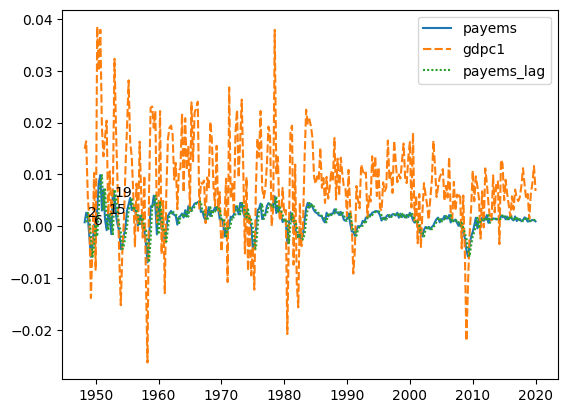

In [21]:
sns.lineplot(df)
for i in [2,6,15,19]:
    plt.text(df.index.to_series().iloc[i], df.payems.iloc[i], str(i))

Frankly, got stuck on this one. Did a lot of searching around on how to handle breakpoints in Python and how to implement them in modeling and did not have a lot of luck. When you review, I would be interested in which modules you're using for this problem in python.